First, we will import the neccessary libaries.

In [22]:
import time
import pandas as pd
import seaborn as sb
import matplotlib as plt
import numpy as np
import scipy
from dask import dataframe as df1
import hvplot.dask
import hvplot.pandas

The dataset is absolutely massive. It will take a while to load. To circumvent this, we will be using a library named Dask, which multithreads the loading and processing of this dataset.

In [2]:
start = time.time()
size_of_data = 0
df = df1.read_csv("./data/chicago_camera_tickets.csv", dtype={'current_amount_due': 'float64',
       'hearing_disposition': 'object',
       'zipcode': 'object',
        'violation_code': 'object'}, low_memory = False)
print("Load completed in " + str(time.time() - start) + "seconds")
df.head(10)

Load completed in 0.02000594139099121seconds


,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,total_payments,ticket_queue,ticket_queue_date,notice_level,notice_number,hearing_disposition,officer,year,month,hour
0,7000004200,2003-11-01 01:04:00,5500 S WESTERN AVE S,b2788131d1b468696d79acbdfd982fb062bde81849979b...,IL,PAS,60629,9102020,RED LIGHT VIOLATION,RDFX,...,90.0,Paid,2003-12-01 00:00:00,VIOL,5046678160,NaN,RDFX,2003,11,1
1,7000004142,2003-11-01 01:35:00,2400 W 55TH STREET E,aa4fcfe3c1a588b5a3764da26cae2cc6feb59a23cef7d5...,IL,TMP,60632,9102020,RED LIGHT VIOLATION,RDFX,...,190.0,Paid,2008-05-15 00:00:00,FINL,5046550880,NaN,RDFX,2003,11,1
2,7000004143,2003-11-01 02:41:00,2400 W 55TH STREET E,ce3f1e6bf33c407041a9d7adc4246352025e2281900fbe...,IL,PAS,62901,9102020,RED LIGHT VIOLATION,RDFX,...,180.0,Paid,2010-02-19 00:00:00,SEIZ,5108042770,NaN,RDFX,2003,11,2
3,7000004144,2003-11-01 05:04:00,2400 W 55TH STREET E,a5abd5e2aa1c0cee5a390d894286798dbf39689fa3db01...,IL,PAS,60638,9102020,RED LIGHT VIOLATION,RDFX,...,90.0,Paid,2003-12-15 00:00:00,DETR,5046447510,NaN,RDFX,2003,11,5
4,7000004145,2003-11-01 06:40:00,2400 W 55TH STREET E,565b2e2b7d0cc723a79d6546158cd60ec4dc53e34d0a69...,IL,PAS,60632,9102020,RED LIGHT VIOLATION,RDFX,...,90.0,Paid,2003-12-16 00:00:00,DETR,5046550890,NaN,RDFX,2003,11,6
5,7000004146,2003-11-01 07:08:00,2400 W 55TH STREET E,6afe6fa5cb2fce9f55e65be57e762537763f481342055a...,IL,PAS,60609,9102020,RED LIGHT VIOLATION,RDFX,...,90.0,Paid,2003-11-21 00:00:00,VIOL,5046550900,NaN,RDFX,2003,11,7
6,7000004449,2003-11-01 07:13:00,2400 W 55TH STREET E,d5e599dee943cd51ce554faa883f72faf9bbe0b9950084...,IL,PAS,60453,9102020,RED LIGHT VIOLATION,RDFX,...,219.6,Paid,2014-12-12 00:00:00,FINL,5046731260,NaN,RDFX,2003,11,7
7,7000004147,2003-11-01 07:23:00,2400 W 55TH STREET E,d5792b00f51e107bfea1955766ec9bb172c65a0141c06c...,IL,PAS,60629,9102020,RED LIGHT VIOLATION,RDFX,...,180.0,Paid,2005-04-30 00:00:00,FINL,5046641350,NaN,RDFX,2003,11,7
8,7000004450,2003-11-01 08:07:00,5500 S WESTERN AVE S,8b0f26ffe3006e1e8a5ce56fe494459eae2df25806cf84...,IL,PAS,60181,9102020,RED LIGHT VIOLATION,RDFX,...,90.0,Paid,2003-12-08 00:00:00,VIOL,5046731270,NaN,RDFX,2003,11,8
9,7000004451,2003-11-01 10:04:00,2400 W 55TH STREET E,9d4f228ee123d5f169ac3b7ac7be3d59bd95b7e15140d9...,IL,PAS,60424,9102020,RED LIGHT VIOLATION,RDFX,...,0.0,Notice,2015-09-04 00:00:00,SEIZ,5046731280,NaN,RDFX,2003,11,10


First things first, let's find out some basic information.
We will find out:
* Size of dataset
* Amount of each type of notice

In [ ]:
print("There are " + str(len(df)) + " tickets issued in this dataset")

In [16]:
print("They were issued around these years")
years_of_tickets = df.groupby('year').year.count().compute()

They were issued around these years


In [25]:
years_of_tickets

year
2003       2573
2004     107426
2005     167804
2006     273117
2007     332261
2008     546424
2009     720116
2010     711850
2011     614688
2012     610282
2013     683525
2018     413803
2014    1724427
2015    1584285
2016    1639992
2017    1424924
Name: year, dtype: int64

<AxesSubplot: xlabel='year'>

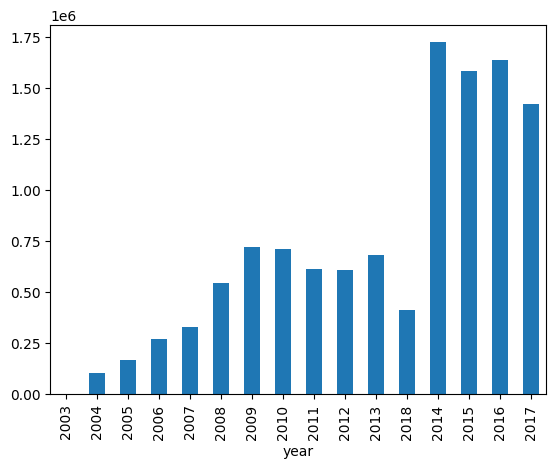

In [34]:
years_of_tickets.plot.bar()

In [ ]:
start = time.time()
print("Totaling a combined fine of")
paidTickets = df[df.ticket_queue == "Paid"].compute()
print(paidTickets['total_payments'].sum())
print("Computation completed in " + str(time.time() - start) + " seconds")

In [15]:
start = time.time()
print("The distribution of the fines paid looks like:")
df.hvplot.kde(y='total_payments')

The distribution of the fines paid looks like:


:Distribution   [total_payments]   (Density)

In [ ]:
print( "Of these tickets, the types of notices they are")
df.groupby('notice_level').notice_level.count().compute()


In [ ]:
start = time.time()
print("The people ticketed were ticketed in these zip codes")
print(df.groupby('zipcode').zipcode.count().compute())
print("Computation completed in " + str(time.time() - start) + " seconds")

In [ ]:
start = time.time()
repeatOffenders = df.groupby('license_plate_number').compute()
print("Astonishingly, one person was ticketed" + repeatOffenders.license_plate_number.max().compute() + " times")
print("Computation completed in " + str(time.time() - start) + " seconds")